# Solving the Knapsack Problem using Simulated Annealing

This notebook's goal is to show you, how you can use `metapy` in order to solve the Knapsack problem. First, we define the problem properly. The problem is:

Given a set of items, each with a weight and a value, determine the number of each item to include in a collection so that the total weight is less than or equal to a given limit and the total value is as large as possible.(Wikipedia)

In [1]:
# 1 stands for: we are including this item 
candidate = [0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0]
values = [69, 21, 33, 50, 89, 58, 27, 95, 52, 68, 26, 84, 46, 28, 25, 81, 82, 27, 50, 61]
weights = [6, 1, 1, 4, 9, 7, 3, 5, 7, 7, 9, 4, 4, 4, 8, 7, 7, 6, 5, 3]


def value(candidate):
    global values, weights
    max_weight = 15
    total_weight = 0

    fitness = 0
    for i, bit in enumerate(candidate):
        if bit == 1:
            total_weight += weights[i]
            fitness += values[i]

    # add penalty for total weights, that are above max weight
    if total_weight > max_weight:
        fitness -= 10 * (total_weight - max_weight)
    return fitness

print("The fitness for our candidate is {}".format(value(candidate)))

The fitness for our candidate is 72


Now that we know, how candidates are looking like and how we can measure the fitness of a candidate we already have enough to try the first optimization algorithm: 
# Simulated Annealing

In [9]:
import metapy as mp
import numpy as np
from metapy.algorithms import SimulatedAnnealing


class SimulatedAnnealingKnapsack(SimulatedAnnealing):
    def __init__(self, values, weights, state=None, init_temperature=None, minimize=True):
        self.values = values
        self.weights = weights
        return super().__init__(state=state, init_temperature=init_temperature, minimize=minimize)
    
    def energy(self, state):
        return value(state)
    
    def alter(self, state):
        return mp.mutation.bit_flip_mutation(state)

sa = SimulatedAnnealingKnapsack(values, weights, state=np.random.randint(0, 2, 20),
                                init_temperature=30, minimize=False)
res = sa.optimize(max_iterations=5000)

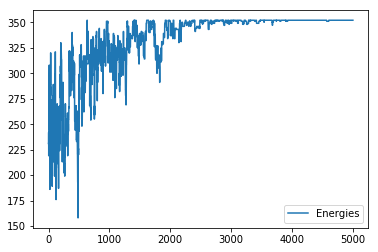

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(np.arange(len(res.best_progress)), res.best_progress, label="Energies")
plt.legend()
plt.show()